Question 1: Regression and out-of-distribution prediction

Datasets on wine quality
Task 1: Explore, visualize, and pre-process the data as appropriate


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


Performing exploratory data analysis

In [ ]:
import pandas as pd

red = pd.read_csv('winequality-red.csv', delimiter=";")
white = pd.read_csv('winequality-white.csv', delimiter=";")
print(red,white)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
print(red.dtypes)
print(white.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [ ]:
print(red.info())
print(white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column   

In [ ]:
print(red.describe())
print(white.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

Observations: From the above plots we can see that Quality and alcohol content of the red and white wines are quite similar across the ranges. Therefore picking **Quality** as dependent variable and all other variables as independent variables



Correlation:
1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation1 = red.corr()
correlation2 = white.corr()

<Axes: >

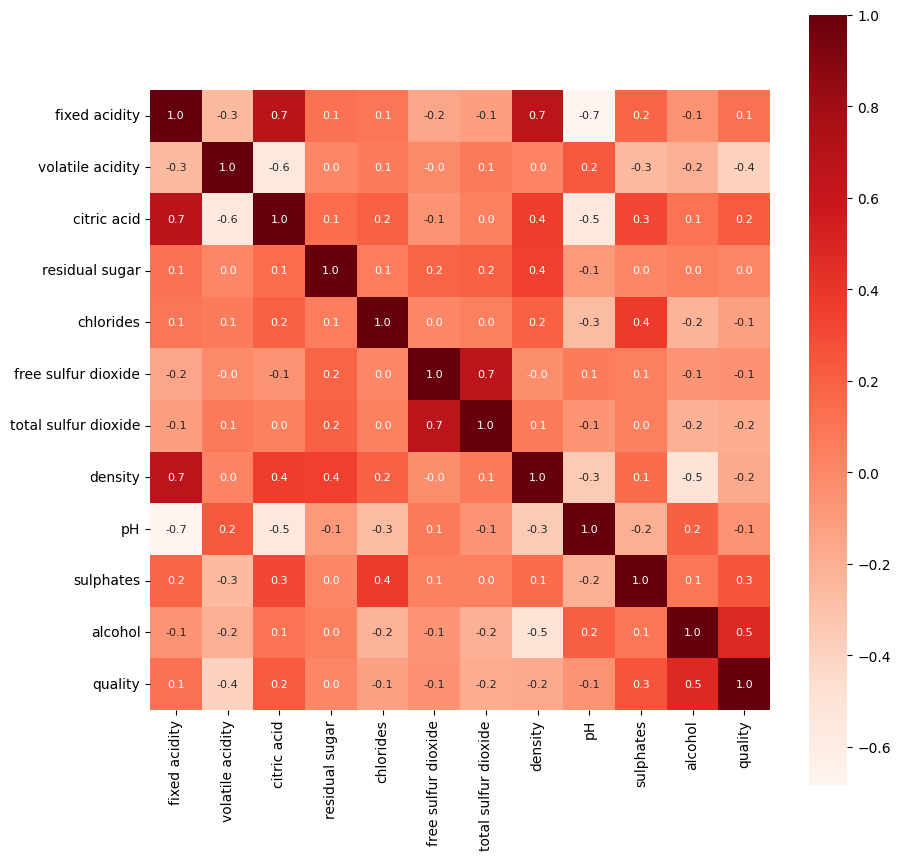

In [ ]:
# construction of heatmap to understand the correlation between the columns
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(correlation1,cbar=True, square = True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Reds')


<Axes: >

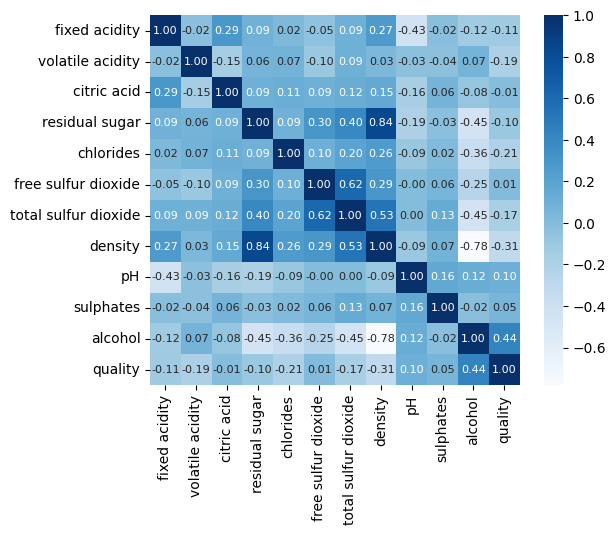

In [ ]:
sns.heatmap(correlation2,cbar=True, square = True, fmt = '.2f', annot = True, annot_kws={'size':8}, cmap = 'Blues')


**Pre-processing the datasets**

Combined Wine Testing Accuracy: 0.67


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# creating classification features of the variables(0,1)
red['goodquality'] = [1 if x >= 7 else 0 for x in red['quality']]# Separate feature variables and target variable
X = red.drop(['quality','goodquality'], axis = 1)
y = red['goodquality']


In [ ]:
# spliting the datasets into training and testing sets (80% as train and 20% test)


# Split red wine data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model for red wine
red_model = RandomForestClassifier(n_estimators=100, random_state=41)
red_model.fit(X_train, y_train)

# Make predictions for red wine
y_pred = red_model.predict(X_test)

# Calculate accuracy for red wine
red_accuracy = accuracy_score(y_test, y_pred)
print("Red Wine Testing Accuracy:", red_accuracy)

Red Wine Testing Accuracy: 0.896875


The accuracy of testing data is less maybe due to the variations in the quality values much compared to other values

testing for white wine

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# independent variables (features)
z = white.drop(columns=['quality'])  # drop both quality and wine_type columns

# Dependent variable (target)
w = white['quality']  # selecting the quality column as the target variable

# Displaying independent and dependent variables
print(z)
print(w)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [ ]:
# creating classification features of the variables(0,1)
white['goodquality'] = [1 if x >= 7 else 0 for x in white['quality']]# Separate feature variables and target variable
z = white.drop(['quality','goodquality'], axis = 1)
w = white['goodquality']

In [ ]:
# spliting the datasets into training and testing sets (80% as train and 20% test)


z_train, z_test, w_train, w_test = train_test_split(z, w, test_size = 0.2, random_state = 42)

#Model training and validation using Random forest Model

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

#Train the model on the training sets
rf_model.fit(z_train, w_train)

# Predictions on training and testing data
w_train_pred = rf_model.predict(z_train)
w_test_pred = rf_model.predict(z_test)

# Make predictions
w_pred = rf_model.predict(z_test)

# Calculate accuracy
accuracy = accuracy_score(w_test, w_pred)
print("white Wine Testing Accuracy:", accuracy)

white Wine Testing Accuracy: 0.8887755102040816


The same goes for the white wine as well, therefore the training based on individual datasets of the both wines isn't giving good accuracy

Using Neural nework with single hidden layer


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# selecting and splitting of the datas has been previously done

# standardize features
scaler_red = StandardScaler()
X_red_scaled = scaler_red.fit_transform(X_train)
X_red_test_scaled = scaler_red.transform(X_test)

#Train the neural network model for the red wine

red_model = MLPClassifier(hidden_layer_sizes = (100,), activation = 'relu', max_iter = 2000, random_state =42)
red_model.fit(X_red_scaled,y_train)


# predictions
y_red_pred = red_model.predict(X_red_test_scaled)

# calculate accuracy for red
red_accuracy_nn = accuracy_score(y_test,y_red_pred)

print("Red Wine testing accuracy:", red_accuracy_nn)

Red Wine testing accuracy: 0.9


In [ ]:
# standardize features
scaler_white = StandardScaler()
z_white_scaled = scaler_white.fit_transform(z_train)
z_white_test_scaled = scaler_white.transform(z_test)

#Train the neural network model for the red wine

white_model = MLPClassifier(hidden_layer_sizes = (100,), activation = 'relu', max_iter = 2000, random_state =42)
white_model.fit(z_white_scaled,w_train)


# predictions
w_white_pred = white_model.predict(z_white_test_scaled)

# calculate accuracy for red
white_accuracy_nn = accuracy_score(w_test,w_white_pred)

print("white Wine testing accuracy:", white_accuracy_nn)

white Wine testing accuracy: 0.8397959183673469


Test the model for red wines with white and checking whether the model on the red wines are applicable or not

In [ ]:
print("Feature names seen during fit:", white.columns[:-1])
print("Feature names in white wine testing data:", X_white_test.columns)

Feature names seen during fit: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Feature names in white wine testing data: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [ ]:
# Testing red on white wine
# red_model and scaler_red is previously defined and have values stored in it

X_white_test = white.drop(columns=['quality'])

# standarize features for white and using scaler_red

z_white_test_scale = scaler_red.transform(z_white_test_scaled)


# predictions for white wine testing data using red wine model
w_white_pred = red_model.predict(z_white_test_scale)

# calculate accuracy for white wine testing data
accuracy_on_white = accuracy_score(w_test,w_white_pred)
print("red wine model accuracy on white wine data:", accuracy_on_white)

red wine model accuracy on white wine data: 0.7683673469387755


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


therefore testing the data on each other wouldn't give enough accuracy of the model:
reason:
1. maybe beacuse of the characterstics and psychometric of both the wines are different

Task 2 : Predict down syndrome

Loading datasets:



In [4]:
from google.colab import files

uploaded = files.upload()

Saving Copy of Data_Cortex_Nuclear.csv to Copy of Data_Cortex_Nuclear.csv


In [5]:
import pandas as pd
import numpy as np
down = pd.read_csv("Copy of Data_Cortex_Nuclear.csv")

Data Exploratory

In [6]:
# Display the first few rows of the dataset
print(down.head())

  MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine   

In [7]:
# checking the shape
print("shape of the dataset:", down.shape)

shape of the dataset: (1080, 82)


In [8]:
#checking for missing values
print("missing values:", down.isnull().sum())

missing values: MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64


In [9]:
# summary statistics
print("summary statistics:", down.describe())

summary statistics:           DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288121     0.473361     0.287444     2.057411     3.155678   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
75%       0.487711     0.698032     0.348197     2.528481     4.440011   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000  ...   
mean      0.233168     0.181846     3.537109     0.212574     1.428682  ...   
std       0.041634     0.027042     1.295169     0.032587     0.466904  ... 

Data Visualization

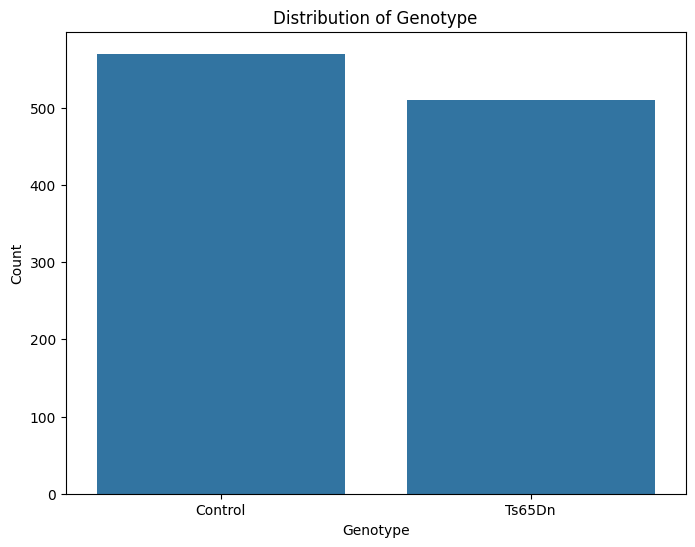

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of target variable (categorical)
plt.figure(figsize=(8, 6))
sns.countplot(x='Genotype', data=down)
plt.title('Distribution of Genotype')
plt.xlabel('Genotype')
plt.ylabel('Count')
plt.show()

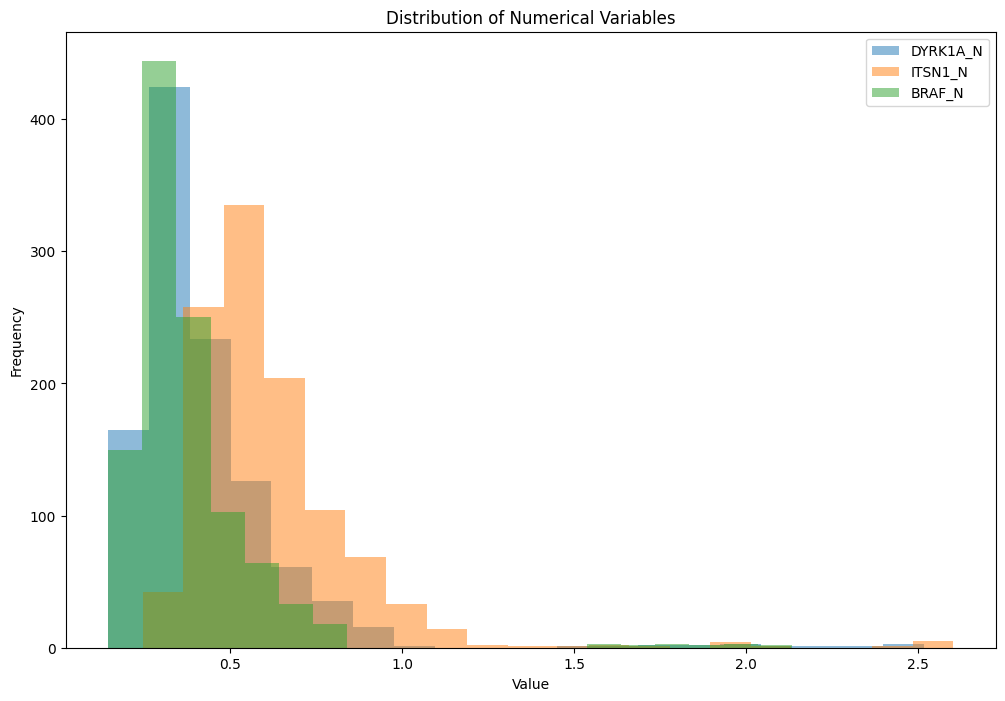

<ipython-input-15-709450fe4dfb>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(down[col], shade=True)
<ipython-input-15-709450fe4dfb>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(down[col], shade=True)
<ipython-input-15-709450fe4dfb>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(down[col], shade=True)


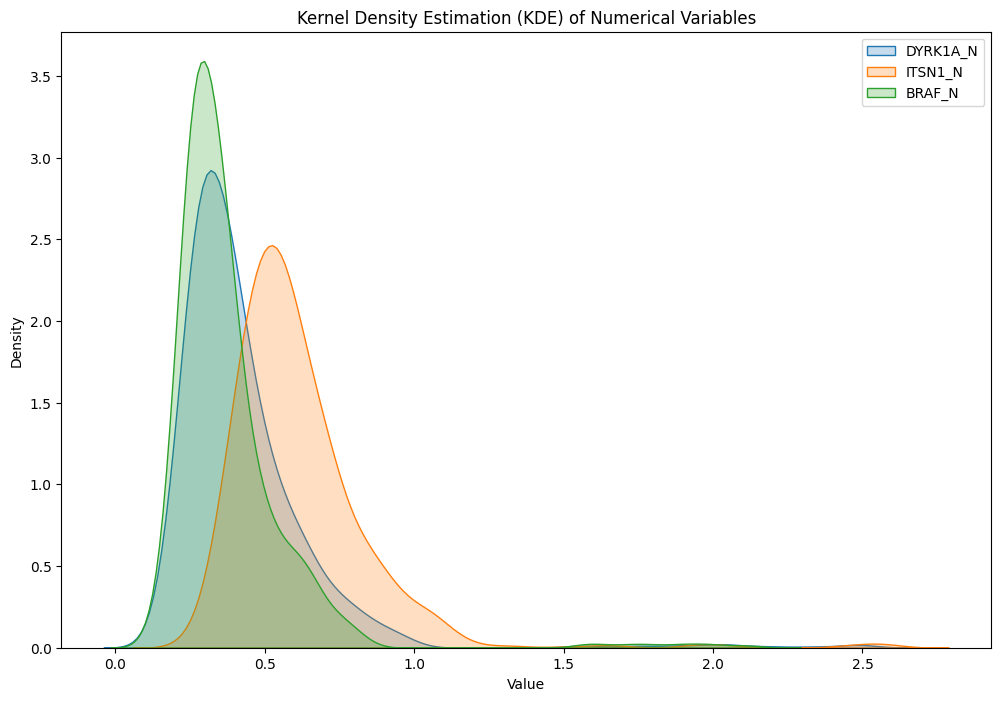

In [15]:
# Visualize distribution of numerical variables using histograms
numerical_cols = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N']  # Example numerical columns
plt.figure(figsize=(12, 8))
for col in numerical_cols:
    plt.hist(down[col], bins=20, alpha=0.5, label=col)
plt.title('Distribution of Numerical Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Alternatively, you can use kernel density estimation (KDE) plots for smoother distributions
plt.figure(figsize=(12, 8))
for col in numerical_cols:
    sns.kdeplot(down[col], shade=True)
plt.title('Kernel Density Estimation (KDE) of Numerical Variables')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(numerical_cols)
plt.show()

Preprocessing and handling missing values

In [22]:
from sklearn.impute import SimpleImputer

# Select numeric columns for imputation
numeric_columns = down.select_dtypes(include='number').columns

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data and transform the numeric columns with missing values
down[numeric_columns] = imputer.fit_transform(down[numeric_columns])

# Check if there are any missing values after imputation
print("Missing values after imputation:\n", down.isnull().sum())

Missing values after imputation:
 MouseID      0
NR2A_N       0
pAKT_N       0
pBRAF_N      0
pCAMKII_N    0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 78, dtype: int64


Multivariate Feature Imputation

In [24]:
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder

# Select only numeric columns for imputation
numeric_columns = down.select_dtypes(include='number').columns

# Drop non-numeric columns before imputation
down_numeric = down[numeric_columns]

# Apply multivariate feature imputation
imputer = IterativeImputer(max_iter=10, random_state=0)
down_imputed_numeric = pd.DataFrame(imputer.fit_transform(down_numeric), columns=down_numeric.columns)

# Check if there are any missing values after imputation
print("Missing values after imputation:\n", down_imputed_numeric.isnull().sum())



Missing values after imputation:
 NR2A_N       0
pAKT_N       0
pBRAF_N      0
pCAMKII_N    0
pCREB_N      0
            ..
SYP_N        0
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Length: 73, dtype: int64


Train, Validate and Test Random Forest Model

In [29]:
# Drop non-numeric columns
X_numeric = X.select_dtypes(include='number')

# Encode categorical variables using one-hot encoding
X_categorical = X.select_dtypes(exclude='number')
X_encoded = pd.get_dummies(X_categorical)

# Concatenate numeric and encoded categorical variables
X_processed = pd.concat([X_numeric, X_encoded], axis=1)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the model (e.g., Random Forest Classifier)
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Validate the model on the validation set
y_val_pred = rf_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val)

# Test the model on the test set
y_test_pred = rf_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy_test)


Validation Accuracy: 0.9876543209876543
Test Accuracy: 0.9938271604938271


Using Support Vector Clssifier with RBF kernel

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize the model (Support Vector Classifier with RBF kernel)
svc_model = SVC(kernel='rbf', random_state=42)

# Train the model on the training data
svc_model.fit(X_train_scaled, y_train)

# Validate the model on the validation set
y_val_pred = svc_model.predict(X_val_scaled)
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy (SVC with RBF Kernel):", accuracy_val)

# Test the model on the test set
y_test_pred = svc_model.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (SVC with RBF Kernel):", accuracy_test)


Validation Accuracy (SVC with RBF Kernel): 0.9814814814814815
Test Accuracy (SVC with RBF Kernel): 1.0


Using Recursive Feature Elimination Method

In [34]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the model (Random Forest Classifier)
rf_model = RandomForestClassifier(random_state=42)

# Initialize RFE
rfe = RFE(estimator=rf_model, n_features_to_select=10, step=1)

# Fit RFE
rfe.fit(X_train_scaled, y_train)

# Get selected feature indices
selected_indices = rfe.support_

# Get selected features
selected_features = X_train.columns[selected_indices]

# Train the model on the selected features
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_scaled[:, selected_indices], y_train)

# Validate the model on the validation set
y_val_pred_selected = rf_model_selected.predict(X_val_scaled[:, selected_indices])
accuracy_val_selected = accuracy_score(y_val, y_val_pred_selected)
print("Validation Accuracy (Selected Features):", accuracy_val_selected)

# Test the model on the test set
y_test_pred_selected = rf_model_selected.predict(X_test_scaled[:, selected_indices])
accuracy_test_selected = accuracy_score(y_test, y_test_pred_selected)
print("Test Accuracy (Selected Features):", accuracy_test_selected)


Validation Accuracy (Selected Features): 0.9691358024691358
Test Accuracy (Selected Features): 0.9876543209876543


oBSERVATIONS:
1. The test accuracy is better, there might be a chance of overfitting of the data, yet the filtering and recursive elimination of the feature gave a good acccuracy score of 0.98

Import Libraries

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy


Set Device

In [36]:
# Set device to GPU if available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Define Data Transformations

In [62]:
import torchvision.transforms as transforms

# Define data transforms for training and validation
train_transforms = transforms.Compose([
    transforms.Resize(256),        # Resize the input image to 256x256 pixels
    transforms.CenterCrop(224),    # Crop the center 224x224 region of the image
    transforms.ToTensor(),         # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])



Load Data

In [57]:
from google.colab import drive
drive.mount('hymenoptera_data')

Drive already mounted at hymenoptera_data; to attempt to forcibly remount, call drive.mount("hymenoptera_data", force_remount=True).


In [58]:
# List the contents of the folder
folder_contents = os.listdir('/content/hymenoptera_data')

# Perform analysis on the contents of the folder
for item in folder_contents:
    item_path = os.path.join('/content/hymenoptera_data', item)
    # Perform analysis on the item (e.g., read files, process data, etc.)
    # Example:
    if os.path.isfile(item_path):
        print(f"File: {item}")
    elif os.path.isdir(item_path):
        print(f"Directory: {item}")
    else:
        print(f"Unknown item type: {item}")

Directory: MyDrive
Directory: .shortcut-targets-by-id
Directory: .file-revisions-by-id
Directory: .Trash-0


In [66]:
import os
from torchvision import datasets

# Set full path to the folder containing the dataset
full_data_dir = '/content/hymenoptera_data'

# Define data transforms (assuming you have already defined data_transforms)
data_transforms = {
    'train': train_transforms,
    'val': val_transforms
}

# Load image datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(full_data_dir, x), data_transforms[x])
                  for x in ['train', 'val']}

# Create data loaders
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4)
               for x in ['train', 'val']}

# Get dataset sizes and class names
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes


FileNotFoundError: [Errno 2] No such file or directory: '/content/hymenoptera_data/train'